# Text Analysis for Digital Humanities: Advanced Analysis With TEI XML

TEI XML stands for Text Encoding Initiative eXtensible Markup Language. In short, it's a way to encode semantic information, i.e. information about meaning, into the text, so that it's easy to extract. 


## What is XML?

Imagine we have a list of two movies. And imagine each of those movies has certain properies. How could we make that data easily machine-readable? 

In XML, we could write it like this: 

```xml

<movies>
    <movie n="1">
      <title>Titanic</title>
      <director>James Cameron</director>
      <year>1997</year>
    </movie>
    <movie n="2">
      <title>Rain Man</title>
      <director>Barry Levinson</director>
      <year>1988</year>
    </movie>
</movies>

```

This is a hierarchical tree representing two movies and their associated properties. Now, we can load this into a string, and parse it using a library like `xml`, like this:

In [1]:
xml = """<movies>
    <movie n="1">
      <title>Titanic</title>
      <director>James Cameron</director>
      <year>1997</year>
    </movie>
    <movie n="2">
      <title>Rain Man</title>
      <director>Barry Levinson</director>
      <year>1988</year>
    </movie>
</movies>
"""

In [7]:
from xml.etree import ElementTree

In [10]:
tree = ElementTree.fromstring(xml)

In [14]:
tree.tag

'movies'

We can get "children" of a given tag like this:

In [16]:
tree.getchildren()

[<Element 'movie' at 0x7f53f09d1bd8>, <Element 'movie' at 0x7f53f05cc458>]

Or children of children:

In [26]:
title = tree.getchildren()[0].getchildren()[0]

In [25]:
title.text

'Titanic'

## What is TEI XML?

TEI XML is a certain brand of XML that can encode information about a text. `<said who="">` tags might encode who says a given line of dialogue, for instance. `<foreign lang="">` might tell us whether a given expression belongs to another language. All of this markup is useful to computational literary analysis. 

For an introduction, see [TEI By Example](http://teibyexample.org/). 

TEI XML files for literary texts may be found at [The Folger Shakespeare Library](https://www.folgerdigitaltexts.org/download/), and [The Oxford Text Archive](http://ota.ox.ac.uk/catalogue/index.html). 

The latter resource also contains plays, including [*She Stoops to Conquer*](https://ota.bodleian.ox.ac.uk/repository/xmlui/handle/20.500.12024/K020903.000 
). The XML file can be found in the `/data` folder of this repo. Let's open it and see what we can do with it.


In [1]:
from lxml import etree
from collections import Counter

# Load the TEI XML file
with open('../data/she_stoops_edit.xml', 'rb') as f:
    tree = etree.parse(f)
    
root = tree.getroot()


In [111]:
# Namespace map
ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

# Initialize a list to hold dialogues along with speakers
dialogues_with_speakers = []

# Iterate through <sp> elements to extract dialogue and associated speaker
for sp in tree.xpath('//tei:sp', namespaces=ns):
    # Extract speaker name; assume there is only one <speaker> per <sp>
    speaker = sp.xpath('./tei:speaker/text()', namespaces=ns)[0] if sp.xpath('./tei:speaker/text()', namespaces=ns) else "Unknown"
    # Extract dialogue content; concatenate all text within <sp> excluding <speaker>
    dialogue_content = "".join(sp.xpath('.//text()[not(parent::tei:speaker)]', namespaces=ns)).strip()
    # Append to our list
    dialogues_with_speakers.append((speaker, dialogue_content))

# Example output for verification
for speaker, dialogue in dialogues_with_speakers[:5]:  # Just show the first 5 for brevity
    print(f"Speaker: {speaker}, Dialogue: {dialogue[:100]}...")  # Show first 100 characters of dialogue


Speaker: MRS. HARDCASTLE, Dialogue: I Vow, Mr. Hardcastle, you're very particular. Is there a creature in the whole country, but ourselv...
Speaker: HARDCASTLE, Dialogue: Ay, and bring back vanity and affectation to last them the whole year. I wonder why London cannot ke...
Speaker: MRS. HARDCASTLE, Dialogue: Ay, your times were fine times, indeed; you have been telling us of them for many a long year. Here ...
Speaker: HARDCASTLE, Dialogue: And I love it. I love every thing that's old: old friends, old times, old manners, old books, old wi...
Speaker: MRS. HARDCASTLE, Dialogue: Lord, Mr. Hardcastle, you're for ever at your Dorothy's and your old wife's. You may be a Darby, but...


In [112]:
from collections import defaultdict
import re

# Assuming dialogues_with_speakers is already populated as shown previously

# Initialize dictionaries for counts and lengths
dialogue_counts = defaultdict(int)
dialogue_lengths = defaultdict(list)

for speaker, dialogue in dialogues_with_speakers:
    # Count dialogues
    dialogue_counts[speaker] += 1
    # Measure dialogue length in words and store
    dialogue_lengths[speaker].append(len(dialogue.split()))

# For analysis, calculate average lengths
average_lengths = {speaker: sum(lengths)/len(lengths) for speaker, lengths in dialogue_lengths.items()}

# Print dialogue counts and average lengths for verification
for speaker in dialogue_counts:
    print(f"{speaker}: {dialogue_counts[speaker]} dialogues, Average length: {average_lengths[speaker]:.2f} words")


MRS. HARDCASTLE: 85 dialogues, Average length: 27.82 words
HARDCASTLE: 133 dialogues, Average length: 26.84 words
TONY: 109 dialogues, Average length: 28.94 words
MISS HARDCASTLE: 108 dialogues, Average length: 24.51 words
MISS NEVILLE: 54 dialogues, Average length: 25.44 words
OMNES: 5 dialogues, Average length: 3.00 words
FIRST FELLOW: 2 dialogues, Average length: 12.00 words
SECOND FELLOW:: 1 dialogues, Average length: 14.00 words
THIRD FELLOW: 2 dialogues, Average length: 30.00 words
FOURTH FELLOW: 1 dialogues, Average length: 21.00 words
SECOND FELLOW: 2 dialogues, Average length: 46.00 words
LANDLORD: 8 dialogues, Average length: 17.00 words
MARLOW: 161 dialogues, Average length: 25.20 words
HASTINGS: 116 dialogues, Average length: 20.21 words
DIGGORY: 10 dialogues, Average length: 18.60 words
FIRST SERVANT: 2 dialogues, Average length: 5.50 words
SECOND SERVANT: 2 dialogues, Average length: 11.50 words
THIRD SERVANT: 1 dialogues, Average length: 4.00 words
ROGER: 1 dialogues, Av

In [113]:
from lxml import etree
from collections import defaultdict
import matplotlib.pyplot as plt

# Namespace map for XPath queries
ns = {'tei': 'http://www.tei-c.org/ns/1.0'}

# Extracting speakers and dialogues
speakers = []
for sp in tree.xpath('//tei:sp', namespaces=ns):
    # Extract speaker name; assume there is only one <speaker> per <sp>
    speaker = sp.xpath('./tei:speaker/text()', namespaces=ns)[0] if sp.xpath('./tei:speaker/text()', namespaces=ns) else "Unknown"
    # Append to our list (speaker name only for this part)
    speakers.append(speaker)


In [114]:
speakers[:10]

['MRS. HARDCASTLE',
 'HARDCASTLE',
 'MRS. HARDCASTLE',
 'HARDCASTLE',
 'MRS. HARDCASTLE',
 'HARDCASTLE',
 'MRS. HARDCASTLE',
 'HARDCASTLE',
 'MRS. HARDCASTLE',
 'HARDCASTLE']

In [115]:
# Create a dictionary to map each speaker to their dialogue occurrence indices
speaker_indices = defaultdict(list)
for index, speaker in enumerate(dialogues_with_speakers):
    speaker_indices[speaker].append(index)


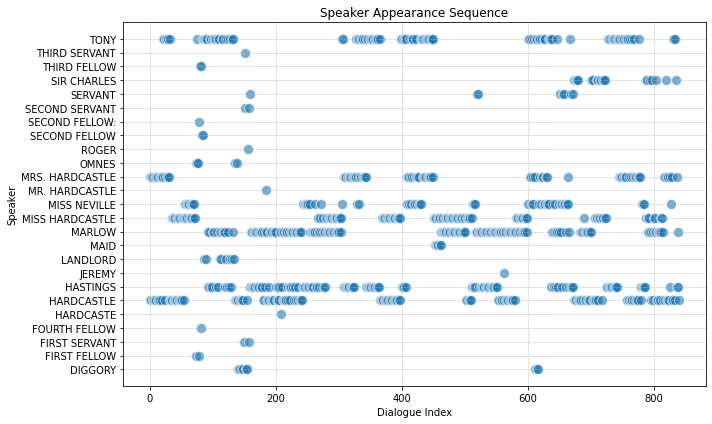

In [116]:
import matplotlib.pyplot as plt

# Provided 'speakers' list with the sequence of speaker appearances

# Map speaker names to unique integers for plotting
speaker_ids = {name: i for i, name in enumerate(sorted(set(speakers)))}
# Inverse mapping for y-axis labels
id_to_speaker = {i: name for name, i in speaker_ids.items()}

# Prepare data for plotting
x = list(range(len(speakers)))  # Dialogue indices
y = [speaker_ids[name] for name in speakers]  # Mapped speaker IDs

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(x, y, alpha=0.6, edgecolors='w', s=100)  # Adjust size (s) and transparency (alpha) as needed

plt.xlabel('Dialogue Index')
plt.ylabel('Speaker')
plt.title('Speaker Appearance Sequence')
plt.yticks(list(id_to_speaker.keys()), list(id_to_speaker.values()))  # Set custom y-axis labels

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [117]:
# Ensure NLTK's punkt tokenizer is available
nltk.download('punkt')

# Initialize dictionary for storing words by speaker
words_by_speaker = defaultdict(list)

# Tokenize dialogues and store words by speaker
for speaker, dialogue in dialogues_with_speakers:
    words = word_tokenize(dialogue.lower())  # Tokenize and convert to lowercase
    words_by_speaker[speaker].extend(words)

# Calculate vocabulary diversity for each speaker
vocab_diversity = {}
for speaker, words in words_by_speaker.items():
    unique_words = set(words)
    total_words = len(words)
    diversity = len(unique_words) / total_words if total_words > 0 else 0
    vocab_diversity[speaker] = diversity

# Print vocabulary diversity for each speaker, sorted by diversity
for speaker, diversity in sorted(vocab_diversity.items(), key=lambda item: item[1], reverse=True):
    print(f"{speaker}: {diversity:.4f}")


SECOND FELLOW:: 1.0000
FIRST SERVANT: 1.0000
THIRD SERVANT: 1.0000
ROGER: 1.0000
SECOND SERVANT: 0.8571
HARDCASTE: 0.8333
MR. HARDCASTLE: 0.8148
FOURTH FELLOW: 0.7826
FIRST FELLOW: 0.7241
THIRD FELLOW: 0.6849
SECOND FELLOW: 0.6471
LANDLORD: 0.6235
JEREMY: 0.6066
MAID: 0.5630
DIGGORY: 0.5595
SERVANT: 0.5419
SIR CHARLES: 0.4758
MISS NEVILLE: 0.3230
OMNES: 0.2857
HASTINGS: 0.2599
MRS. HARDCASTLE: 0.2460
MISS HARDCASTLE: 0.2456
MARLOW: 0.2240
TONY: 0.2222
HARDCASTLE: 0.2198


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
from collections import Counter

# Calculate overall word frequencies in the document
overall_word_freq = Counter()
for words in words_by_speaker.values():
    overall_word_freq.update(words)

# Calculate word frequencies per speaker and identify characteristic words
characteristic_words = {}
for speaker, words in words_by_speaker.items():
    # Word frequencies for the current speaker
    speaker_word_freq = Counter(words)
    
    # Words more frequent for the speaker than in the overall document, adjusted for speaker's total word count
    speaker_total_words = sum(speaker_word_freq.values())
    overall_total_words = sum(overall_word_freq.values())
    
    # Filter words: more common in speaker's dialogue than on average across the document
    # Adjust the threshold and logic as needed for your analysis
    characteristic_words[speaker] = {
        word: freq for word, freq in speaker_word_freq.items()
        if freq / speaker_total_words > overall_word_freq[word] / overall_total_words * 1.5  # Example threshold
    }

# Sort and print the characteristic words for each speaker, limited to top 5 for brevity
for speaker, words in characteristic_words.items():
    sorted_words = sorted(words.items(), key=lambda item: item[1], reverse=True)[:10]  # Top 10 words
    print(f"{speaker}: {', '.join([word for word, freq in sorted_words])}")


MRS. HARDCASTLE: we, was, dear, mr., tony, they, us, our, see, 're
HARDCASTLE: ;, his, see, like, kate, old, out, own, believe, ay
TONY: 's, 'll, them, she, then, tell, 'd, ecod, by, here
MISS HARDCASTLE: sir, him, his, 'm, ha, never, one, think, shall, like
MISS NEVILLE: it, him, from, at, cousin, will, has, mr., aunt, dear
OMNES: ,, ., hurrea, bravo, ay, a, song, no
FIRST FELLOW: ., for, a, song, the, 'squire, now, gentlemen, silence, is
SECOND FELLOW:: i, loves, to, hear, him, sing, bekeays, he, never, gives
THIRD FELLOW: bear, a, that, it, of, may, be, my, o, damn
FOURTH FELLOW: the, genteel, thing, a, is, at, any, time, if, so
SECOND FELLOW: the, a, for, it, his, he, is, 'squire, own, be
LANDLORD: you, a, to, be, they, in, have, as, ;, hardcastle
MARLOW: me, (, ), an, madam, house, yes, aside, too, george
HASTINGS: but, ?, are, at, her, we, miss, them, let, must
DIGGORY: i, the, your, worship, !, ecod, for, he, have, hold
FIRST SERVANT: i, 'm, not, to, leave, this, pleace, where, 

In [119]:
# Assuming dialogues_with_speakers contains (speaker, dialogue) tuples

# Initialize counters for interactions
interactions = defaultdict(lambda: defaultdict(int))

# Iterate through dialogues to count interactions
for i in range(len(dialogues_with_speakers) - 1):
    current_speaker, _ = dialogues_with_speakers[i]
    next_speaker, _ = dialogues_with_speakers[i + 1]
    
    # Count the interaction
    interactions[current_speaker][next_speaker] += 1

# Function to print interactions for a specific character
def print_interactions_for_character(character):
    print(f"Interactions for {character}:")
    for interlocutor, count in interactions[character].items():
        print(f"  Talks to {interlocutor}: {count} times")
    print("\n")

# Print interactions for Miss Hardcastle
print_interactions_for_character("MISS HARDCASTLE")

# Compare Miss Hardcastle's interactions with Marlow to others
marlow_interactions_with_miss_hardcastle = interactions["MARLOW"]["MISS HARDCASTLE"]
miss_hardcastle_interactions_with_marlow = interactions["MISS HARDCASTLE"]["MARLOW"]

print(f"Miss Hardcastle talks to Marlow: {miss_hardcastle_interactions_with_marlow} times")
print(f"Marlow talks to Miss Hardcastle: {marlow_interactions_with_miss_hardcastle} times")


Interactions for MISS HARDCASTLE:
  Talks to HARDCASTLE: 32 times
  Talks to MISS HARDCASTLE: 1 times
  Talks to MISS NEVILLE: 8 times
  Talks to OMNES: 1 times
  Talks to MARLOW: 49 times
  Talks to TONY: 3 times
  Talks to MAID: 6 times
  Talks to HASTINGS: 2 times
  Talks to SIR CHARLES: 6 times


Miss Hardcastle talks to Marlow: 49 times
Marlow talks to Miss Hardcastle: 49 times


In [120]:
# Segment dialogues by MISS HARDCASTLE based on the interlocutor
dialogues_to_marlow = []
dialogues_to_others = []

for i in range(len(dialogues_with_speakers) - 1):
    current_speaker, current_dialogue = dialogues_with_speakers[i]
    next_speaker, _ = dialogues_with_speakers[i + 1]
    
    # Ensure we're only looking at MISS HARDCASTLE's dialogues
    if current_speaker == "MISS HARDCASTLE":
        if next_speaker == "MARLOW":
            dialogues_to_marlow.append(current_dialogue)
        else:
            dialogues_to_others.append(current_dialogue)


In [121]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure nltk resources are available
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_most_frequent_words(dialogues):
    words = []
    for dialogue in dialogues:
        # Tokenize and filter stopwords
        tokenized = word_tokenize(dialogue.lower())
        words.extend([word for word in tokenized if word.isalpha() and word not in stop_words])
    
    # Count and return most frequent words
    return Counter(words).most_common(10)  # Adjust the number as needed

# Analyze most frequent words for MISS HARDCASTLE when talking to MARLOW and to others
frequent_words_to_marlow = get_most_frequent_words(dialogues_to_marlow)
frequent_words_to_others = get_most_frequent_words(dialogues_to_others)

print("Most frequent words when MISS HARDCASTLE talks to MARLOW:")
for word, count in frequent_words_to_marlow:
    print(f"{word}: {count}")

print("\nMost frequent words when MISS HARDCASTLE talks to others:")
for word, count in frequent_words_to_others:
    print(f"{word}: {count}")


Most frequent words when MISS HARDCASTLE talks to MARLOW:
sir: 28
ha: 12
think: 9
sure: 9
could: 7
ever: 6
one: 6
aside: 5
upon: 5
must: 5

Most frequent words when MISS HARDCASTLE talks to others:
sir: 13
never: 13
shall: 12
like: 10
one: 9
papa: 7
find: 6
must: 6
look: 6
face: 6


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
import nltk
from nltk.text import Text

nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [126]:
# Concatenate dialogues for each scenario
text_to_marlow = " ".join(dialogues_to_marlow).lower()
text_to_others = " ".join(dialogues_to_others).lower()

# Tokenize
tokens_to_marlow = [word for word in word_tokenize(text_to_marlow) if word.isalpha()]
tokens_to_others = [word for word in word_tokenize(text_to_others) if word.isalpha()]

# Create nltk.Text objects
text_obj_to_marlow = Text(tokens_to_marlow)
text_obj_to_others = Text(tokens_to_others)


In [127]:
# Assuming you want to plot concordance for the word 'sir'
word_of_interest = 'sir'

# Generate concordance plot for dialogues with Marlow
print("Concordance for 'sir' when MISS HARDCASTLE talks to MARLOW:")
text_obj_to_marlow.concordance(word_of_interest)

# Generate concordance plot for dialogues with others
print("\nConcordance for 'sir' when MISS HARDCASTLE talks to others:")
text_obj_to_others.concordance(word_of_interest)

Concordance for 'sir' when MISS HARDCASTLE talks to MARLOW:
Displaying 25 of 28 matches:
dents by the way i afraid you flatter sir you that have seen so much of the fin
not been wholly an observer i presume sir the ladies i should hope have employe
y worst way to obtain them not at all sir there is nothing i like so much as gr
ng reaches the heart i understand you sir there must be some who wanting a reli
and so do i to him you were observing sir that in this age of hypocrisy somethi
f hypocrisy something about hypocrisy sir i understand you perfectly sir you me
ocrisy sir i understand you perfectly sir you mean that in this hypocritical ag
 when they praise it not in the least sir there something so agreeable and spir
spirited in your manner such life and sir go on i agree with you entirely a wan
 to excel i beg you proceed i protest sir i never was more agreeably entertaine
go on well then i follow did you call sir did your honour call did your honour 
nour call did your honour call 

In [129]:
from nltk import BigramAssocMeasures, BigramCollocationFinder

# Function to find and print collocations with "sir"
def find_collocations(tokens):
    bigram_measures = BigramAssocMeasures()
    finder = BigramCollocationFinder.from_words(tokens)
    # Filter to keep only bigrams that contain "sir"
    finder.apply_ngram_filter(lambda w1, w2: "sir" not in (w1, w2))
    # Find top 5 bigrams by frequency
    scored = finder.score_ngrams(bigram_measures.raw_freq)
    return sorted(scored, key=lambda s: s[1], reverse=True)[:10]  # Adjust the number as needed

# Find collocations for dialogues with Marlow
collocations_marlow = find_collocations(tokens_to_marlow)
print("Top associated words with 'sir' when Miss Hardcastle talks to Marlow:")
for bigram, freq in collocations_marlow:
    print(f"{bigram}: {freq}")

# Find collocations for dialogues with others
collocations_others = find_collocations(tokens_to_others)
print("\nTop associated words with 'sir' when Miss Hardcastle talks to others:")
for bigram, freq in collocations_others:
    print(f"{bigram}: {freq}")


Top associated words with 'sir' when Miss Hardcastle talks to Marlow:
('sir', 'i'): 0.00586756077116513
('sir', 'you'): 0.004191114836546521
('sir', 'there'): 0.002514668901927913
('sir', 'that'): 0.0016764459346186086
('sir', 'we'): 0.0016764459346186086
('yes', 'sir'): 0.0016764459346186086
('all', 'sir'): 0.0008382229673093043
('and', 'sir'): 0.0008382229673093043
('call', 'sir'): 0.0008382229673093043
('called', 'sir'): 0.0008382229673093043

Top associated words with 'sir' when Miss Hardcastle talks to others:
('sir', 'i'): 0.002097902097902098
('sir', 'you'): 0.002097902097902098
('hope', 'sir'): 0.0013986013986013986
('abrupt', 'sir'): 0.0006993006993006993
('agreement', 'sir'): 0.0006993006993006993
('go', 'sir'): 0.0006993006993006993
('him', 'sir'): 0.0006993006993006993
('much', 'sir'): 0.0006993006993006993
('of', 'sir'): 0.0006993006993006993
('pleasure', 'sir'): 0.0006993006993006993


In [131]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Assuming dialogues_to_marlow and dialogues_to_others are already defined and populated

def calculate_average_sentiment(dialogues):
    total_compound_score = 0
    for dialogue in dialogues:
        scores = sia.polarity_scores(dialogue)
        total_compound_score += scores['compound']
    return total_compound_score / len(dialogues) if dialogues else 0

average_sentiment_to_marlow = calculate_average_sentiment(dialogues_to_marlow)
average_sentiment_to_others = calculate_average_sentiment(dialogues_to_others)

print(f"Average Sentiment Score when Miss Hardcastle talks to Marlow: {average_sentiment_to_marlow:.3f}")
print(f"Average Sentiment Score when Miss Hardcastle talks to others: {average_sentiment_to_others:.3f}")


Average Sentiment Score when Miss Hardcastle talks to Marlow: 0.225
Average Sentiment Score when Miss Hardcastle talks to others: 0.342


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tomvannuenen/nltk_data...


In [132]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_dialogues(dialogues):
    processed_dialogues = []
    for dialogue in dialogues:
        tokens = word_tokenize(dialogue.lower())
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
        processed_dialogues.append(tokens)
    return processed_dialogues

# Preprocess dialogues
processed_to_marlow = preprocess_dialogues(dialogues_to_marlow)
processed_to_others = preprocess_dialogues(dialogues_to_others)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [138]:
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Example: assuming dialogues_to_marlow and dialogues_to_others contain full dialogues as strings
full_dialogues_to_marlow = " ".join(dialogues_to_marlow)
full_dialogues_to_others = " ".join(dialogues_to_others)

# Sentence segmentation
sentences_to_marlow = sent_tokenize(full_dialogues_to_marlow)
sentences_to_others = sent_tokenize(full_dialogues_to_others)


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tomvannuenen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [140]:
def calculate_metrics(tokens, sentences):
    total_words = len(tokens)
    unique_words = len(set(tokens))
    total_sentences = len(sentences)
    average_sentence_length = total_words / total_sentences if total_sentences > 0 else 0
    ttr = unique_words / total_words if total_words > 0 else 0
    return total_words, unique_words, average_sentence_length, ttr

metrics_to_marlow = calculate_metrics(tokens_to_marlow, sentences_to_marlow)
metrics_to_others = calculate_metrics(tokens_to_others, sentences_to_others)

# Print the metrics for both contexts
contexts = ["Marlow", "Others"]
for context, metrics in zip(contexts, [metrics_to_marlow, metrics_to_others]):
    print(f"Context: {context}")
    print(f"  Total Words: {metrics[0]}")
    print(f"  Unique Words: {metrics[1]}")
    print(f"  Average Sentence Length: {metrics[2]:.2f}")
    print(f"  Type-Token Ratio (TTR): {metrics[3]:.4f}\n")


Context: Marlow
  Total Words: 1193
  Unique Words: 440
  Average Sentence Length: 11.25
  Type-Token Ratio (TTR): 0.3688

Context: Others
  Total Words: 1430
  Unique Words: 515
  Average Sentence Length: 12.43
  Type-Token Ratio (TTR): 0.3601



In [141]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'interactions' is a dictionary where keys are characters and values are dictionaries
# of characters they interact with along with the counts of interactions

G = nx.Graph()

for speaker, others in interactions.items():
    for other, count in others.items():
        G.add_edge(speaker, other, weight=count)

# Optionally, remove nodes if you want to focus on main characters only
# G.remove_node('SomeMinorCharacter')


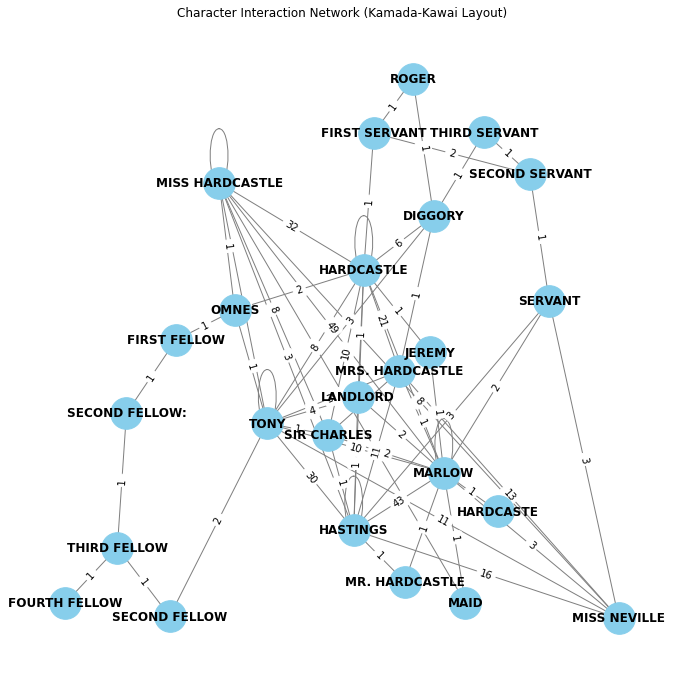

In [152]:
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed
pos = nx.kamada_kawai_layout(G)  # Kamada-Kawai layout

# Draw the network with the Kamada-Kawai layout
nx.draw_networkx(G, pos, node_size=1000, node_color="skyblue", with_labels=True, font_weight="bold", edge_color="gray")

# If previously used, drawing edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Character Interaction Network (Kamada-Kawai Layout)")
plt.axis('off')  # Hide the axes
plt.show()
